In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, string, nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
punct = string.punctuation + ")" + "(" + ":" + ";"

In [86]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
sample = pd.read_excel('Sample_Submission.xlsx')

In [87]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [88]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [89]:
train.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,Casino Royale: James Bond 007 (Vintage),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [90]:
test.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,Doing Justice: A Prosecutor’s Thoughts on Crim...,Agatha Christie,"Paperback,– 2016",5.0 out of 5 stars,1 customer review,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Reviews         1560 non-null object
Ratings         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [93]:
train.Price = np.log1p(train.Price)

In [94]:
q1 = train.Price.quantile(0.25)
q3 = train.Price.quantile(0.75)
iqr = q3-q1
upper = q3+2.5*iqr
lower = q1-2.5*iqr
x = np.where((train.Price < lower )| (train.Price.values>upper))
train.drop(index = x[0], inplace=True)
train.reset_index(drop=True, inplace=True)

In [95]:
def words(text):
    return(len(str(text).lower().split())/len(str(text)))

def n_unique_word(text):
    return(len(set(str(text).lower().split()))/len(str(text)))

def letter(text):
    return(len(str(text)))

def n_clean_words(text):
    s = [w for w in str(text).split() if w not in stopwords and w not in list(punct)]
    return(len(s)/len(str(text)))

def n_stopwords(text):
    s = [w for w in str(text).split() if w in stopwords]
    return(len(s)/len(str(text)))

def n_punctuation(text):
    s = [w for w in str(text).lower().split() if w in list(punct)]
    return(len(s)/len(str(text)))

def n_title(text):
    s = [w for w in str(text).split() if w.istitle()]
    return(len(s)/len(str(text)))

def n_Upper(text):
    s = [w for w in str(text).split() if w.isupper()]
    return(len(s)/len(str(text)))

def n_Lower(text):
    s = [w for w in str(text).split() if w.islower()]
    return(len(s)/len(str(text)))

train['Title_unique_word'] = train.Title.apply(lambda x: n_unique_word(x))
test['Title_unique_word'] = test.Title.apply(lambda x: n_unique_word(x))

train['Synopsis_unique_word'] = train.Synopsis.apply(lambda x: n_unique_word(x))
test['Synopsis_unique_word'] = test.Synopsis.apply(lambda x: n_unique_word(x))

train['Title_count'] = train.Title.apply(lambda x: words(x))
test['Title_count'] = test.Title.apply(lambda x: words(x))

train['Synopsis_count'] = train.Synopsis.apply(lambda x: words(x))
test['Synopsis_count'] = test.Synopsis.apply(lambda x: words(x))

train['Title_count_char'] = train.Title.apply(lambda x: letter(x))
test['Title_count_char'] = test.Title.apply(lambda x: letter(x))

train['Synopsis_count_char'] = train.Synopsis.apply(lambda x: letter(x))
test['Synopsis_count_char'] = test.Synopsis.apply(lambda x: letter(x))

train['Title_n_st'] = train.Title.apply(lambda x: n_stopwords(x))
test['Title_n_st'] = test.Title.apply(lambda x: n_stopwords(x))

train['Synopsis_n_st'] = train.Synopsis.apply(lambda x: n_stopwords(x))
test['Synopsis_n_st'] = test.Synopsis.apply(lambda x: n_stopwords(x))

train['Title_n_punct'] = train.Title.apply(lambda x: n_punctuation(x))
test['Title_n_punct'] = test.Title.apply(lambda x: n_punctuation(x))

train['Synopsis_n_punct'] = train.Synopsis.apply(lambda x: n_punctuation(x))
test['Synopsis_n_punct'] = test.Synopsis.apply(lambda x: n_punctuation(x))

train['Title_title_word'] = train.Title.apply(lambda x: n_title(x))
test['Title_title_word'] = test.Title.apply(lambda x: n_title(x))

train['Synopsis_title_word'] = train.Synopsis.apply(lambda x: n_title(x))
test['Synopsis_title_word'] = test.Synopsis.apply(lambda x: n_title(x))

train['Title_upper_word'] = train.Title.apply(lambda x: n_Upper(x))
test['Title_upper_word'] = test.Title.apply(lambda x: n_Upper(x))

train['Synopsis_upper_word'] = train.Synopsis.apply(lambda x: n_Upper(x))
test['Synopsis_upper_word'] = test.Synopsis.apply(lambda x: n_Upper(x))

train['Title_lower_word'] = train.Title.apply(lambda x: n_Lower(x))
test['Title_lower_word'] = test.Title.apply(lambda x: n_Lower(x))

train['Synopsis_lower_word'] = train.Synopsis.apply(lambda x: n_Lower(x))
test['Synopsis_lower_word'] = test.Synopsis.apply(lambda x: n_Lower(x))

train['Title_n_clean_word'] = train.Title.apply(lambda x: n_clean_words(x))
test['Title_n_clean_word'] = test.Title.apply(lambda x: n_clean_words(x))

train['Synopsis_n_clean_word'] = train.Synopsis.apply(lambda x: n_clean_words(x))
test['Synopsis_n_clean_word'] = test.Synopsis.apply(lambda x: n_clean_words(x))

#train['Title_0'] = train.Title.str.extract(r"(^.*):+(.*$)")[0]
#train['Title_1'] = train.Title.str.extract(r"(^.*):+(.*$)")[1]

#test['Title_0'] = test.Title.str.extract(r"(^.*):+(.*$)")[0]
#test['Title_1'] = test.Title.str.extract(r"(^.*):+(.*$)")[1]

#train['Title_0'] = train.Title_0.apply(lambda x: words(x))
#test['Title_0'] = test.Title_0.apply(lambda x: words(x))

#train['Title_1'] = train.Title_1.apply(lambda x: words(x))
#test['Title_1'] = test.Title_1.apply(lambda x: words(x))

In [96]:
au_tr = set(train.Author).difference(set(test.Author))
au_te = set(test.Author).difference(set(train.Author))
train.Author = train.Author.apply(lambda x: 'other' if x in list(au_tr) else x)
test.Author = test.Author.apply(lambda x: 'other' if x in (au_te) else x)

In [97]:
train['Date'] = train.Edition.str.extract(r"(\d\d\d\d$)")
test['Date'] = test.Edition.str.extract(r"(\d\d\d\d$)")

In [98]:
train.Date.fillna(2014, inplace=True)
test.Date.fillna(2014, inplace=True)

In [99]:
train.Edition.str.extract(r'(^[a-zA-Z]*),.*')[0].value_counts()

Paperback     5185
Hardcover      813
Flexibound      15
Cards            8
Name: 0, dtype: int64

In [100]:
train['Edition_1'] = train.Edition.str.extract(r'(^[a-zA-Z]*),.*')
test['Edition_1'] = test.Edition.str.extract(r'(^[a-zA-Z]*),.*')

In [101]:
train['Edition_2'] = train.Edition.str.extract(r'^.* -*(.*),.*')
test['Edition_2'] = test.Edition.str.extract(r'^.* -*(.*),.*')

In [102]:
train.Edition_2.fillna('other', inplace=True)
test.Edition_2.fillna('other', inplace=True)

In [103]:
t = set(train.Edition_2.value_counts().index).difference(set(test.Edition_2.value_counts().index))
train.Edition_2 = train.Edition_2.apply(lambda x: np.NaN if x in list(t) else x)

In [104]:
train.Edition_2.fillna('other', inplace=True)
test.Edition_2.fillna('other', inplace=True)

In [105]:
train.Edition_1.fillna('Paperback', inplace=True)

In [106]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)

In [107]:
train['Review_t'] = train.Reviews.str.extract(r"(^\d\.*\d*)")
test['Review_t'] = test.Reviews.str.extract(r"(^\d\.*\d*)")

In [108]:
train['Rating_t'] = train.Reviews.str.extract(r"(^\d*)")
test['Rating_t'] = test.Reviews.str.extract(r"(^\d*)")

In [109]:
train['Rat_Rev'] = train.Rating_t.astype('float') * train.Review_t.astype('float')
test['Rat_Rev'] = test.Rating_t.astype('float') * test.Review_t.astype('float')

#train['Rat_Rev'] = train['Rat_Rev'].apply(lambda x: x/5)
#test['Rat_Rev'] = test['Rat_Rev'].apply(lambda x: x/5)

In [110]:
train.Genre.value_counts()

Action & Adventure (Books)               946
Romance (Books)                          418
Biographies & Autobiographies (Books)    373
Crime, Thriller & Mystery (Books)        276
Contemporary Fiction (Books)             256
                                        ... 
Dance (Books)                              1
Budget Travel                              1
Essay, Letter & Review Writing             1
Governmental                               1
Mysticism                                  1
Name: Genre, Length: 345, dtype: int64

In [111]:
test.Genre.value_counts()

Action & Adventure (Books)               236
Romance (Books)                           98
Biographies & Autobiographies (Books)     90
Contemporary Fiction (Books)              69
Crime, Thriller & Mystery (Books)         59
                                        ... 
Film & Television                          1
Library & Information Science              1
Children's Language Learning (Books)       1
Programming Algorithms                     1
C# Programming                             1
Name: Genre, Length: 225, dtype: int64

In [112]:
au_tr = set(train.Genre).difference(set(test.Genre))
au_te = set(test.Genre).difference(set(train.Genre))
train['Genre_t'] = train.Genre.apply(lambda x: 'other' if x in list(au_tr) else x)
test['Genre_t'] = test.Genre.apply(lambda x: 'other' if x in (au_te) else x)

In [113]:
train.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Title_unique_word,Synopsis_unique_word,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Title_upper_word,Synopsis_upper_word,Title_lower_word,Synopsis_lower_word,Title_n_clean_word,Synopsis_n_clean_word,Date,Edition_1,Edition_2,Review_t,Rating_t,Rat_Rev,Genre_t
0,The Prisoner's Gold (The Hunters 3),other,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,5.398163,0.171429,0.126422,0.171429,0.165613,35,791,0.000000,0.059418,0.0,0.0,0.114286,0.030341,0.000000,0.005057,0.000000,0.127686,0.171429,0.106195,2016,Paperback,other,4.0,4,16.0,Action & Adventure (Books)
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",5.317777,0.205882,0.104712,0.205882,0.159686,34,1146,0.029412,0.050611,0.0,0.0,0.176471,0.036649,0.029412,0.001745,0.029412,0.117801,0.176471,0.109075,2012,Paperback,other,3.9,3,11.7,Cinema & Broadcast (Books)


In [114]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(1,3)
x = tfidf.fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

tfidf = TfidfVectorizer(ngram_range=(1,4))
z = tfidf.fit_transform(pd.concat([train.Title, test.Title], axis = 0))

tfidf = TfidfVectorizer(ngram_range=(1,4))
e = tfidf.fit_transform(pd.concat([train.Genre_t, test.Genre_t], axis = 0))

In [115]:
#x = CountVectorizer().fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

In [116]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=80)
x = pd.DataFrame(pca.fit_transform(x), columns = [a for a in range(80)])
z = pd.DataFrame(pca.fit_transform(z), columns = [a for a in range(80,160)])
e = pd.DataFrame(pca.fit_transform(e), columns = [a for a in range(160,240)])

In [117]:
np.sum(pca.explained_variance_ratio_)

0.8936075768921217

In [118]:
train.shape, test.shape

((6218, 34), (1560, 33))

In [119]:
tr = x.iloc[:6218,:]
te = x.iloc[6218:,:]
te.reset_index(drop = True, inplace=True)

tr_z = z.iloc[:6218,:]
te_z = z.iloc[6218:,:]
te_z.reset_index(drop = True, inplace=True)

tr_e = e.iloc[:6218,:]
te_e = e.iloc[6218:,:]
te_e.reset_index(drop = True, inplace=True)

In [120]:
train = pd.concat([train, tr, tr_z, tr_e], axis = 1)
test = pd.concat([test, te, te_z, te_e], axis = 1)

In [121]:
train.reset_index(drop = True, inplace=True)
train.shape, test.shape

((6218, 274), (1560, 273))

In [122]:
train.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)
test.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)

In [123]:
(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Columns: 268 entries, Author to 239
dtypes: float64(258), int64(2), object(8)
memory usage: 12.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Columns: 267 entries, Author to 239
dtypes: float64(257), int64(2), object(8)
memory usage: 3.2+ MB


(None, None)

In [124]:
train.Author = train.Author.astype('category')
train.BookCategory = train.BookCategory.astype('category')
train.Edition_1 = train.Edition_1.astype('category')
train.Edition_2 = train.Edition_2.astype('category')
train.Genre_t = train.Genre_t.astype('category')
train.Rating_t = train.Rating_t.astype('float')
train.Review_t = train.Review_t.astype('float')


test.Author = test.Author.astype('category')
test.BookCategory = test.BookCategory.astype('category')
test.Edition_1 = test.Edition_1.astype('category')
test.Edition_2 = test.Edition_2.astype('category')
test.Genre_t = test.Genre_t.astype('category')
test.Rating_t = test.Rating_t.astype('float')
test.Review_t = test.Review_t.astype('float')

train.Date = train.Date.apply(lambda x: 2019-int(x))
test.Date = test.Date.apply(lambda x: 2019-int(x))

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Columns: 268 entries, Author to 239
dtypes: category(5), float64(260), int64(3)
memory usage: 12.6 MB


In [126]:
train_label = train.Price
train.drop(columns = 'Price', inplace=True)

In [127]:
train.shape, test.shape

((6218, 267), (1560, 267))

0.3301209576472281 0.6426398962328981


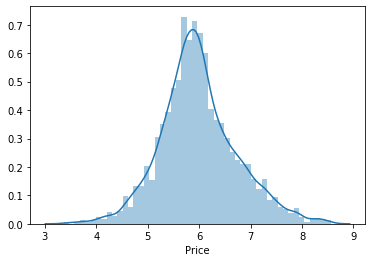

In [128]:
sns.distplot(train_label)
print(train_label.skew(), train_label.kurt())

-0.09289632401651765 0.7765571837733471


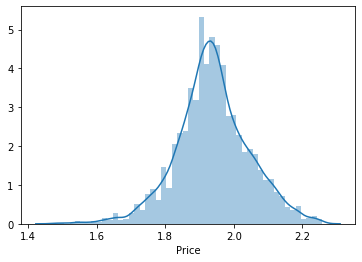

In [129]:
sns.distplot(np.log1p(train_label))
print(np.log1p(train_label).skew(), np.log1p(train_label).kurt())

In [130]:
#train_label = train_label.apply(lambda x: np.log1p(x))

df = pd.DataFrame(pd.concat([train[c], test[c]], axis = 0), columns =train.columns)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in train.columns:
    if train[c].ftype == 'category:dense' :
        df[c] = le.fit_transform(pd.concat([train[c], test[c]], axis = 0))
    else :
        df[c] = pd.concat([train[c], test[c]], axis = 0)

In [131]:
pd.set_option('max_column',200)
train.head()

,Author,BookCategory,Title_unique_word,Synopsis_unique_word,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Title_upper_word,Synopsis_upper_word,Title_lower_word,Synopsis_lower_word,Title_n_clean_word,Synopsis_n_clean_word,Date,Edition_1,Edition_2,Review_t,Rating_t,Rat_Rev,Genre_t,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239
0,other,Action & Adventure,0.171429,0.126422,0.171429,0.165613,35,791,0.000000,0.059418,0.0,0.0,0.114286,0.030341,0.000000,0.005057,0.000000,0.127686,0.171429,0.106195,3,Paperback,other,4.0,4.0,16.0,Action & Adventure (Books),0.227455,0.037542,-0.024352,-0.064573,0.022902,0.072928,-0.041056,0.049884,0.041675,0.006539,-0.030893,-0.005958,0.009890,-0.001528,-0.012591,0.011589,0.018540,-0.039627,0.029820,0.035937,-0.049540,-0.011706,0.002686,0.018928,-0.000752,-0.016022,-0.038247,-0.049176,0.023309,0.008340,-0.013235,-0.014799,-0.006101,-0.014200,-0.018790,-0.029563,-0.029040,0.001540,-0.013862,-0.004197,-0.008420,-0.016147,0.014479,0.032316,-0.012182,0.058720,-0.003936,-0.020624,0.027446,0.021422,0.023630,0.000422,-0.007898,-0.011780,-0.027076,0.014381,-0.011012,-0.032811,0.008731,-0.007534,-0.006598,-0.008718,-0.020005,0.028755,0.001835,0.027893,-0.062050,0.022776,0.030539,0.049824,-0.012223,-0.018490,-0.010675,...,-0.000253,-0.004469,0.000681,-0.000972,-0.000423,-0.000700,0.000927,0.002764,-0.000434,-0.000699,0.006581,0.003951,-0.005291,-0.002939,0.000519,-0.000441,0.000096,-0.003582,0.001474,-0.003259,9.988683e-01,-4.368367e-02,-9.860787e-03,-1.181162e-02,-3.397925e-03,-3.214989e-03,-9.015865e-13,4.950529e-03,-5.184606e-03,-4.401092e-03,7.625023e-05,-1.532773e-03,-1.787511e-03,6.797626e-09,-1.791881e-03,-1.042969e-03,-1.283682e-03,1.289652e-04,-2.731131e-04,-1.346887e-03,-8.283213e-04,-4.923294e-06,-2.188394e-04,-1.145986e-04,-4.690117e-04,-8.188666e-04,0.000055,-7.145806e-04,-0.000568,0.001229,-0.000644,-0.000300,-4.471819e-04,-0.000007,-0.000416,-0.000675,-0.000883,-0.000842,-0.000012,-1.476763e-04,-0.000299,-0.000151,-0.000172,-0.000172,-0.000329,-0.000394,-0.000214,0.000019,-0.000469,-0.000333,-0.000004,-0.000297,3.314966e-06,-0.000004,-0.000408,-0.000028,-0.000086,-0.000806,0.000002,-0.000221,0.000013,-0.000132,-0.000034,-0.000096,-0.000049,0.000062,-0.000055,-0.000175,-0.000111,-0.000270,0.000038,-0.000036,0.000045,-0.000115,-0.000181,-0.000081,-0.000020,-0.000024,-0.000259,0.000010
1,Arun Khopkar,"Biographies, Diaries & True Accounts",0.205882,0.104712,0.205882,0.159686,34,1146,0.029412,0.050611,0.0,0.0,0.176471,0.036649,0.029412,0.001745,0.029412,0.117801,0.176471,0.109075,7,Paperback,other,3.9,3.0,11.7,Cinema & Broadcast (Books),0.199100,-0.018893,-0.057341,0.026915,0.021258,-0.043508,-0.013153,-0.017368,-0.026626,-0.052720,0.012295,0.041192,-0.001769,0.046477,0.017694,-0.009855,-0.030365,0.030828,0.016170,0.013156,-0.038142,0.025314,-0.007704,-0.011867,-0.016762,-0.002417,-0.014044,-0.018397,-0.024336,-0.006903,-0.000110,-0.021761,-0.036680,0.001409,-0.034492,-0.005416,-0.004865,-0.036265,0.025016,-0.023428,0.005182,0.019660,0.004278,0.053972,0.011113,0.046147,-0.002984,-0.008527,-0.024313,-0.059105,-0.077106,0.019312,0.020442,-0.011123,-0.007091,0.008468,0.045760,-0.014492,-0.010004,0.025737,-0.013385,0.012383,-0.038203,-0.038089,-0.033720,0.001394,0.033786,-0.006244,0.002350,-0.017172,0.014947,-0.009154,-0.037021,...,-0.002690,0.

In [132]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.concat([train,test], axis = 0)
df.Author = le.fit_transform(df.Author)
df.Genre_t = le.fit_transform(df.Genre_t)
train.shape, test.shape

((6218, 267), (1560, 267))

In [133]:
train = df.iloc[:6218,:]
test = df.iloc[6218:,:]
test.reset_index(drop=True, inplace=True)

In [134]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)
print(train.shape, test.shape)

(6218, 290) (1560, 290)


In [135]:
train.head()

,Author,Title_unique_word,Synopsis_unique_word,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Title_upper_word,Synopsis_upper_word,Title_lower_word,Synopsis_lower_word,Title_n_clean_word,Synopsis_n_clean_word,Date,Review_t,Rating_t,Rat_Rev,Genre_t,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,...,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_1_Flexibound,Edition_1_Hardcover,Edition_1_Paperback,Edition_2_Audiobook,Edition_2_Edge,Edition_2_Edition,Edition_2_Illustrated,Edition_2_Import,Edition_2_Leaf,Edition_2_Paperback,Edition_2_Print,Edition_2_Unabridged,Edition_2_eBook,Edition_2_music,Edition_2_other,Edition_2_set
0,530,0.171429,0.126422,0.171429,0.165613,35,791,0.000000,0.059418,0.0,0.0,0.114286,0.030341,0.000000,0.005057,0.000000,0.127686,0.171429,0.106195,3,4.0,4.0,16.0,1,0.227455,0.037542,-0.024352,-0.064573,0.022902,0.072928,-0.041056,0.049884,0.041675,0.006539,-0.030893,-0.005958,0.009890,-0.001528,-0.012591,0.011589,0.018540,-0.039627,0.029820,0.035937,-0.049540,-0.011706,0.002686,0.018928,-0.000752,-0.016022,-0.038247,-0.049176,0.023309,0.008340,-0.013235,-0.014799,-0.006101,-0.014200,-0.018790,-0.029563,-0.029040,0.001540,-0.013862,-0.004197,-0.008420,-0.016147,0.014479,0.032316,-0.012182,0.058720,-0.003936,-0.020624,0.027446,0.021422,0.023630,0.000422,-0.007898,-0.011780,-0.027076,0.014381,-0.011012,-0.032811,0.008731,-0.007534,-0.006598,-0.008718,-0.020005,0.028755,0.001835,0.027893,-0.062050,0.022776,0.030539,0.049824,-0.012223,-0.018490,-0.010675,-0.024614,0.005295,0.000733,...,-9.015865e-13,4.950529e-03,-5.184606e-03,-4.401092e-03,7.625023e-05,-1.532773e-03,-1.787511e-03,6.797626e-09,-1.791881e-03,-1.042969e-03,-1.283682e-03,1.289652e-04,-2.731131e-04,-1.346887e-03,-8.283213e-04,-4.923294e-06,-2.188394e-04,-1.145986e-04,-4.690117e-04,-8.188666e-04,0.000055,-7.145806e-04,-0.000568,0.001229,-0.000644,-0.000300,-4.471819e-04,-0.000007,-0.000416,-0.000675,-0.000883,-0.000842,-0.000012,-1.476763e-04,-0.000299,-0.000151,-0.000172,-0.000172,-0.000329,-0.000394,-0.000214,0.000019,-0.000469,-0.000333,-0.000004,-0.000297,3.314966e-06,-0.000004,-0.000408,-0.000028,-0.000086,-0.000806,0.000002,-0.000221,0.000013,-0.000132,-0.000034,-0.000096,-0.000049,0.000062,-0.000055,-0.000175,-0.000111,-0.000270,0.000038,-0.000036,0.000045,-0.000115,-0.000181,-0.000081,-0.000020,-0.000024,-0.000259,0.000010,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,36,0.205882,0.104712,0.205882,0.159686,34,1146,0.029412,0.050611,0.0,0.0,0.176471,0.036649,0.029412,0.001745,0.029412,0.117801,0.176471,0.109075,7,3.9,3.0,11.7,49,0.199100,-0.018893,-0.057341,0.026915,0.021258,-0.043508,-0.013153,-0.017368,-0.026626,-0.052720,0.012295,0.041192,-0.001769,0.046477,0.017694,-0.009855,-0.030365,0.030828,0.016170,0.013156,-0.038142,0.025314,-0.007704,-0.011867,-0.016762,-0.002417,-0.014044,-0.018397,-0.024336,-0.006903,-0.000110,-0.021761,-0.036680,0.001409,-0.034492,-0.005416,-0.004865,-0.036265,0.025016,-0.023428,0.005182,0.019660,0.004278,0.053972,0.011113,0.046147,-0.002984,-0.008527,-0.024313,-0.059105,-0.077106,0.019312,0.020442,-0.011123,-0.007091,0.008468,0.045760,-0.014492,-0.0

In [136]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)

In [137]:
#from sklearn.preprocessing import MinMaxScaler
#mmx = MinMaxScaler()
#train = pd.DataFrame(mmx.fit_transform(train), columns = train.columns)
#test = pd.DataFrame(mmx.fit_transform(test), columns = test.columns)

In [138]:
train.shape, test.shape

((6218, 290), (1560, 290))

# ML

In [139]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [140]:
score = cross_val_score(xgb.XGBRegressor(), train, train_label, scoring='neg_mean_squared_error', cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:44:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:44:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [141]:
score

array([-0.30792644, -0.2895957 , -0.32664514])

In [142]:
param_xgb = {}
param_xgb['learning_rate'] = 0.08
param_xgb['seed'] = 17
param_xgb['eval_metric'] = 'rmse'
param_xgb['objective'] = 'reg:squarederror'

param_lgb = {}
param_lgb['objective'] = 'regression'
param_lgb['learning_rate'] = 0.03
param_lgb['seed'] = 13
param_lgb['metric'] = 'rmse'

def func(train, train_label, test, name):
    pred = pd.DataFrame(data = np.zeros(shape = (train.shape[0], 3)))
    pred.columns = [a for a in range(3)]
    
    pred_test = pd.DataFrame(data = np.zeros(shape = (test.shape[0], 3)))
    pred_test.columns = [a for a in range(3)]
    
    k = KFold(n_splits=3, shuffle=True, random_state=2019)
    i = 0
    for t_index, v_index in k.split(train_label.ravel()):
        xtrain , ytrain = train.loc[t_index,:], train_label[t_index]
        xtest , ytest = train.loc[v_index,:], train_label[v_index]
        if(name == 'lgb'):
            trainset = lgb.Dataset(xtrain, label=ytrain)
            testset = lgb.Dataset(xtest, label=ytest)
            best = lgb.train(param_lgb , trainset, valid_sets=[trainset,testset], num_boost_round=10000,
                             early_stopping_rounds= 200)
            pred.loc[:,i] = best.predict(train, best_iteration = best.best_iteration)
            
            pred_test.loc[:,i] = best.predict(test, best_iteration = best.best_iteration)
            i = i +1
            
        else : 
            trainset = xgb.DMatrix(xtrain, label=ytrain)
            testset = xgb.DMatrix(xtest,label=ytest)
            t = xgb.DMatrix(test)
            f = xgb.DMatrix(train)
            best = xgb.train(list(param_xgb.items()) ,trainset, evals=[(trainset, 'train'),(testset,'test')],
                    num_boost_round=10000, early_stopping_rounds= 200)
            pred.loc[:,i] = best.predict(f, ntree_limit = best.best_ntree_limit)
            
            pred_test.loc[:,i] = best.predict(t, ntree_limit = best.best_ntree_limit)
            i = i +1
    
    return(pred,pred_test,best)

In [143]:
train_xgb, test_xgb, model = func(train,train_label, test, 'xgb')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:5.09715	test-rmse:5.11173
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4.69666	test-rmse:4.71022
[2]	train-rmse:4.32882	test-rmse:4.34401
[3]	train-rmse:3.99084	test-rmse:4.00648
[4]	train-rmse:3.67997	test-rmse:3.69518
[5]	train-rmse:3.39469	test-rmse:3.41146
[6]	train-rmse:3.13263	test-rmse:3.15081
[7]	train-rmse:2.89167	test-rmse:2.91068
[8]	train-rmse:2.67071	test-rmse:2.69106
[9]	train-rmse:2.46763	test-rmse:2.48812
[10]	train-rmse:2.28161	test-rmse:2.30389
[11]	train-rmse:2.11061	test-rmse:2.13435
[12]	train-rmse:1.95375	test-rmse:1.97878
[13]	train-rmse:1.81034	test-rmse:1.83687
[14]	train-rmse:1.67884	test-rmse:1.7083
[15]	train-rmse:1.55799	test-rmse:1.58971
[16]	train-rmse:1.44753	test-rmse:1.48215
[17]	train-rmse:1.34635	test-rmse:1.38408
[18]	train-rmse:1.25411	test-rmse:1.29601
[19]	train-rmse:1.16987	test-rmse:1.21609
[20]	train-rmse:1.09269	tes

[184]	train-rmse:0.148922	test-rmse:0.531703
[185]	train-rmse:0.14735	test-rmse:0.531438
[186]	train-rmse:0.146835	test-rmse:0.531386
[187]	train-rmse:0.146223	test-rmse:0.531438
[188]	train-rmse:0.145534	test-rmse:0.531294
[189]	train-rmse:0.144296	test-rmse:0.531169
[190]	train-rmse:0.142792	test-rmse:0.531038
[191]	train-rmse:0.142271	test-rmse:0.531003
[192]	train-rmse:0.141851	test-rmse:0.530955
[193]	train-rmse:0.141005	test-rmse:0.531012
[194]	train-rmse:0.139856	test-rmse:0.530889
[195]	train-rmse:0.138943	test-rmse:0.530866
[196]	train-rmse:0.137948	test-rmse:0.530682
[197]	train-rmse:0.136948	test-rmse:0.530612
[198]	train-rmse:0.13564	test-rmse:0.530571
[199]	train-rmse:0.135208	test-rmse:0.530503
[200]	train-rmse:0.133838	test-rmse:0.530403
[201]	train-rmse:0.133476	test-rmse:0.530366
[202]	train-rmse:0.132571	test-rmse:0.530429
[203]	train-rmse:0.131574	test-rmse:0.530373
[204]	train-rmse:0.130702	test-rmse:0.530292
[205]	train-rmse:0.130227	test-rmse:0.530198
[206]	train-

[368]	train-rmse:0.056999	test-rmse:0.526621
[369]	train-rmse:0.05683	test-rmse:0.526599
[370]	train-rmse:0.056698	test-rmse:0.526561
[371]	train-rmse:0.05646	test-rmse:0.526561
[372]	train-rmse:0.056264	test-rmse:0.526531
[373]	train-rmse:0.056018	test-rmse:0.526506
[374]	train-rmse:0.055928	test-rmse:0.526483
[375]	train-rmse:0.055728	test-rmse:0.526487
[376]	train-rmse:0.055533	test-rmse:0.526459
[377]	train-rmse:0.055145	test-rmse:0.526464
[378]	train-rmse:0.054854	test-rmse:0.526459
[379]	train-rmse:0.054493	test-rmse:0.526469
[380]	train-rmse:0.054317	test-rmse:0.526476
[381]	train-rmse:0.054104	test-rmse:0.526463
[382]	train-rmse:0.053708	test-rmse:0.526458
[383]	train-rmse:0.053436	test-rmse:0.526427
[384]	train-rmse:0.053195	test-rmse:0.526397
[385]	train-rmse:0.053018	test-rmse:0.526388
[386]	train-rmse:0.052628	test-rmse:0.526364
[387]	train-rmse:0.052414	test-rmse:0.526345
[388]	train-rmse:0.052187	test-rmse:0.52634
[389]	train-rmse:0.052121	test-rmse:0.526329
[390]	train-r

[551]	train-rmse:0.031188	test-rmse:0.525887
[552]	train-rmse:0.031154	test-rmse:0.525894
[553]	train-rmse:0.031019	test-rmse:0.5259
[554]	train-rmse:0.030967	test-rmse:0.525892
[555]	train-rmse:0.030934	test-rmse:0.525883
[556]	train-rmse:0.030911	test-rmse:0.525888
[557]	train-rmse:0.030809	test-rmse:0.525889
[558]	train-rmse:0.030775	test-rmse:0.5259
[559]	train-rmse:0.030696	test-rmse:0.525894
[560]	train-rmse:0.030602	test-rmse:0.525863
[561]	train-rmse:0.030558	test-rmse:0.525871
[562]	train-rmse:0.030488	test-rmse:0.525865
[563]	train-rmse:0.030455	test-rmse:0.525861
[564]	train-rmse:0.030369	test-rmse:0.525872
[565]	train-rmse:0.030243	test-rmse:0.525863
[566]	train-rmse:0.030159	test-rmse:0.525876
[567]	train-rmse:0.030128	test-rmse:0.525889
[568]	train-rmse:0.030097	test-rmse:0.525891
[569]	train-rmse:0.029973	test-rmse:0.525893
[570]	train-rmse:0.029921	test-rmse:0.525897
[571]	train-rmse:0.029769	test-rmse:0.525894
[572]	train-rmse:0.029731	test-rmse:0.525881
[573]	train-rm

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4.69717	test-rmse:4.71018
[2]	train-rmse:4.3296	test-rmse:4.34297
[3]	train-rmse:3.99169	test-rmse:4.00554
[4]	train-rmse:3.68126	test-rmse:3.6956
[5]	train-rmse:3.39553	test-rmse:3.41045
[6]	train-rmse:3.13344	test-rmse:3.14956
[7]	train-rmse:2.89282	test-rmse:2.90954
[8]	train-rmse:2.67157	test-rmse:2.68942
[9]	train-rmse:2.46848	test-rmse:2.48786
[10]	train-rmse:2.28213	test-rmse:2.30233
[11]	train-rmse:2.1109	test-rmse:2.13251
[12]	train-rmse:1.95411	test-rmse:1.9779
[13]	train-rmse:1.81064	test-rmse:1.83621
[14]	train-rmse:1.67884	test-rmse:1.70621
[15]	train-rmse:1.55835	test-rmse:1.5875
[16]	train-rmse:1.4481	test-rmse:1.47943
[17]	train-rmse:1.34697	test-rmse:1.38213
[18]	train-rmse:1.2547	test-rmse:1.29169
[19]	train-rmse:1.17029	test-rmse:1.20951
[20]	train-rmse:1.09319	test-rmse:1.13634
[21]	train-rmse:1.02321	test-rmse:1.06931
[22]	train-rmse:0.959407	test-rmse:1.00882
[23]	train-rmse:0.901204	test-rms

[187]	train-rmse:0.147258	test-rmse:0.507529
[188]	train-rmse:0.146503	test-rmse:0.507553
[189]	train-rmse:0.146107	test-rmse:0.507492
[190]	train-rmse:0.145057	test-rmse:0.507406
[191]	train-rmse:0.144047	test-rmse:0.507443
[192]	train-rmse:0.143675	test-rmse:0.507387
[193]	train-rmse:0.142989	test-rmse:0.507232
[194]	train-rmse:0.142329	test-rmse:0.507096
[195]	train-rmse:0.140843	test-rmse:0.507053
[196]	train-rmse:0.140313	test-rmse:0.507114
[197]	train-rmse:0.138866	test-rmse:0.506876
[198]	train-rmse:0.137557	test-rmse:0.506694
[199]	train-rmse:0.136817	test-rmse:0.506571
[200]	train-rmse:0.136288	test-rmse:0.506485
[201]	train-rmse:0.135265	test-rmse:0.506481
[202]	train-rmse:0.134338	test-rmse:0.506438
[203]	train-rmse:0.133473	test-rmse:0.506375
[204]	train-rmse:0.132823	test-rmse:0.506335
[205]	train-rmse:0.132088	test-rmse:0.50633
[206]	train-rmse:0.131529	test-rmse:0.506263
[207]	train-rmse:0.130334	test-rmse:0.50624
[208]	train-rmse:0.129554	test-rmse:0.506122
[209]	train-

[371]	train-rmse:0.055874	test-rmse:0.504258
[372]	train-rmse:0.055535	test-rmse:0.50429
[373]	train-rmse:0.055168	test-rmse:0.504256
[374]	train-rmse:0.054897	test-rmse:0.504262
[375]	train-rmse:0.054703	test-rmse:0.504247
[376]	train-rmse:0.054482	test-rmse:0.504276
[377]	train-rmse:0.05437	test-rmse:0.504263
[378]	train-rmse:0.05423	test-rmse:0.504283
[379]	train-rmse:0.053894	test-rmse:0.504306
[380]	train-rmse:0.05357	test-rmse:0.504342
[381]	train-rmse:0.053431	test-rmse:0.504337
[382]	train-rmse:0.053043	test-rmse:0.504344
[383]	train-rmse:0.052794	test-rmse:0.504328
[384]	train-rmse:0.05267	test-rmse:0.504338
[385]	train-rmse:0.052502	test-rmse:0.504341
[386]	train-rmse:0.052331	test-rmse:0.504332
[387]	train-rmse:0.051987	test-rmse:0.504309
[388]	train-rmse:0.051802	test-rmse:0.5043
[389]	train-rmse:0.051548	test-rmse:0.504274
[390]	train-rmse:0.051389	test-rmse:0.504288
[391]	train-rmse:0.051228	test-rmse:0.504246
[392]	train-rmse:0.051008	test-rmse:0.504269
[393]	train-rmse:

[555]	train-rmse:0.027883	test-rmse:0.503899
[556]	train-rmse:0.027835	test-rmse:0.503904
[557]	train-rmse:0.027738	test-rmse:0.503899
[558]	train-rmse:0.027644	test-rmse:0.503888
[559]	train-rmse:0.02752	test-rmse:0.503876
[560]	train-rmse:0.027503	test-rmse:0.503882
[561]	train-rmse:0.027348	test-rmse:0.503866
[562]	train-rmse:0.027262	test-rmse:0.503868
[563]	train-rmse:0.027193	test-rmse:0.503872
[564]	train-rmse:0.027145	test-rmse:0.503882
[565]	train-rmse:0.027079	test-rmse:0.503879
[566]	train-rmse:0.027045	test-rmse:0.503879
[567]	train-rmse:0.026989	test-rmse:0.503882
[568]	train-rmse:0.026955	test-rmse:0.503888
[569]	train-rmse:0.026879	test-rmse:0.503887
[570]	train-rmse:0.026834	test-rmse:0.503886
[571]	train-rmse:0.026759	test-rmse:0.503869
[572]	train-rmse:0.026714	test-rmse:0.503868
[573]	train-rmse:0.0266	test-rmse:0.503879
[574]	train-rmse:0.026514	test-rmse:0.503886
[575]	train-rmse:0.026456	test-rmse:0.503893
[576]	train-rmse:0.02635	test-rmse:0.503887
[577]	train-rm

[63]	train-rmse:0.327815	test-rmse:0.548832
[64]	train-rmse:0.325257	test-rmse:0.548613
[65]	train-rmse:0.321935	test-rmse:0.547919
[66]	train-rmse:0.318334	test-rmse:0.54761
[67]	train-rmse:0.316113	test-rmse:0.547206
[68]	train-rmse:0.312118	test-rmse:0.547031
[69]	train-rmse:0.309506	test-rmse:0.546507
[70]	train-rmse:0.307857	test-rmse:0.546098
[71]	train-rmse:0.304238	test-rmse:0.54613
[72]	train-rmse:0.302634	test-rmse:0.545873
[73]	train-rmse:0.299151	test-rmse:0.545638
[74]	train-rmse:0.297331	test-rmse:0.545583
[75]	train-rmse:0.295787	test-rmse:0.545569
[76]	train-rmse:0.293058	test-rmse:0.545445
[77]	train-rmse:0.290352	test-rmse:0.545188
[78]	train-rmse:0.288914	test-rmse:0.545036
[79]	train-rmse:0.286127	test-rmse:0.544955
[80]	train-rmse:0.283574	test-rmse:0.544372
[81]	train-rmse:0.282875	test-rmse:0.544438
[82]	train-rmse:0.279999	test-rmse:0.543776
[83]	train-rmse:0.27769	test-rmse:0.543577
[84]	train-rmse:0.275554	test-rmse:0.543675
[85]	train-rmse:0.272085	test-rmse:

[247]	train-rmse:0.103396	test-rmse:0.534435
[248]	train-rmse:0.102742	test-rmse:0.534385
[249]	train-rmse:0.102407	test-rmse:0.534387
[250]	train-rmse:0.102093	test-rmse:0.534374
[251]	train-rmse:0.101664	test-rmse:0.53435
[252]	train-rmse:0.10108	test-rmse:0.534327
[253]	train-rmse:0.10057	test-rmse:0.534316
[254]	train-rmse:0.100134	test-rmse:0.534371
[255]	train-rmse:0.099274	test-rmse:0.534242
[256]	train-rmse:0.098729	test-rmse:0.53426
[257]	train-rmse:0.098142	test-rmse:0.534239
[258]	train-rmse:0.097706	test-rmse:0.534259
[259]	train-rmse:0.096793	test-rmse:0.534222
[260]	train-rmse:0.096319	test-rmse:0.534219
[261]	train-rmse:0.096029	test-rmse:0.534267
[262]	train-rmse:0.095417	test-rmse:0.534255
[263]	train-rmse:0.094705	test-rmse:0.534096
[264]	train-rmse:0.094088	test-rmse:0.534078
[265]	train-rmse:0.093559	test-rmse:0.534021
[266]	train-rmse:0.093263	test-rmse:0.534065
[267]	train-rmse:0.09265	test-rmse:0.534029
[268]	train-rmse:0.092337	test-rmse:0.534004
[269]	train-rms

[431]	train-rmse:0.043341	test-rmse:0.533563
[432]	train-rmse:0.043261	test-rmse:0.533573
[433]	train-rmse:0.042978	test-rmse:0.533566
[434]	train-rmse:0.042826	test-rmse:0.533549
[435]	train-rmse:0.042728	test-rmse:0.533566
[436]	train-rmse:0.042467	test-rmse:0.533594
[437]	train-rmse:0.042379	test-rmse:0.533582
[438]	train-rmse:0.042221	test-rmse:0.533607
[439]	train-rmse:0.042042	test-rmse:0.533593
[440]	train-rmse:0.041755	test-rmse:0.533604
[441]	train-rmse:0.041566	test-rmse:0.533611
[442]	train-rmse:0.041473	test-rmse:0.533619
[443]	train-rmse:0.041399	test-rmse:0.533625
[444]	train-rmse:0.04136	test-rmse:0.533621
[445]	train-rmse:0.041263	test-rmse:0.533627
[446]	train-rmse:0.041006	test-rmse:0.533635
[447]	train-rmse:0.040776	test-rmse:0.53362
[448]	train-rmse:0.040503	test-rmse:0.533649
[449]	train-rmse:0.040449	test-rmse:0.533656
[450]	train-rmse:0.040193	test-rmse:0.533627
[451]	train-rmse:0.040128	test-rmse:0.533626
[452]	train-rmse:0.039971	test-rmse:0.533616
[453]	train-

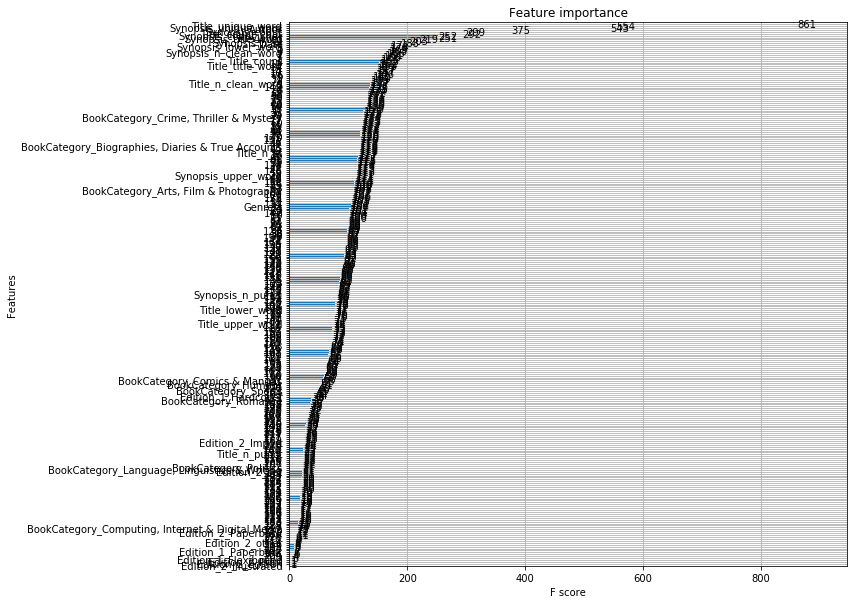

In [144]:
fig, ax  = plt.subplots(1,1, figsize=(10,10))
xgb.plot_importance(model, ax = ax)

In [145]:
train_lgb, test_lgb ,model = func(train,train_label,test,'lgb')

[1]	training's rmse: 0.734669	valid_1's rmse: 0.747922
Training until validation scores don't improve for 200 rounds.
[2]	training's rmse: 0.726585	valid_1's rmse: 0.741422
[3]	training's rmse: 0.718769	valid_1's rmse: 0.735254
[4]	training's rmse: 0.711428	valid_1's rmse: 0.729236
[5]	training's rmse: 0.704254	valid_1's rmse: 0.723705
[6]	training's rmse: 0.697373	valid_1's rmse: 0.718416
[7]	training's rmse: 0.690788	valid_1's rmse: 0.713554
[8]	training's rmse: 0.684331	valid_1's rmse: 0.70846
[9]	training's rmse: 0.677804	valid_1's rmse: 0.70335
[10]	training's rmse: 0.671805	valid_1's rmse: 0.698925
[11]	training's rmse: 0.665918	valid_1's rmse: 0.694754
[12]	training's rmse: 0.660222	valid_1's rmse: 0.690836
[13]	training's rmse: 0.654541	valid_1's rmse: 0.686773
[14]	training's rmse: 0.649184	valid_1's rmse: 0.682878
[15]	training's rmse: 0.64392	valid_1's rmse: 0.679226
[16]	training's rmse: 0.639005	valid_1's rmse: 0.675738
[17]	training's rmse: 0.634149	valid_1's rmse: 0.6722

[147]	training's rmse: 0.361909	valid_1's rmse: 0.551
[148]	training's rmse: 0.360779	valid_1's rmse: 0.550785
[149]	training's rmse: 0.359675	valid_1's rmse: 0.55066
[150]	training's rmse: 0.358654	valid_1's rmse: 0.550512
[151]	training's rmse: 0.357544	valid_1's rmse: 0.550272
[152]	training's rmse: 0.356406	valid_1's rmse: 0.550004
[153]	training's rmse: 0.355342	valid_1's rmse: 0.549931
[154]	training's rmse: 0.354332	valid_1's rmse: 0.549811
[155]	training's rmse: 0.353209	valid_1's rmse: 0.549688
[156]	training's rmse: 0.3522	valid_1's rmse: 0.549528
[157]	training's rmse: 0.35104	valid_1's rmse: 0.549348
[158]	training's rmse: 0.35002	valid_1's rmse: 0.549141
[159]	training's rmse: 0.349068	valid_1's rmse: 0.548972
[160]	training's rmse: 0.348056	valid_1's rmse: 0.548834
[161]	training's rmse: 0.34693	valid_1's rmse: 0.548628
[162]	training's rmse: 0.345852	valid_1's rmse: 0.548495
[163]	training's rmse: 0.344738	valid_1's rmse: 0.548457
[164]	training's rmse: 0.343676	valid_1'

[292]	training's rmse: 0.245367	valid_1's rmse: 0.534689
[293]	training's rmse: 0.244775	valid_1's rmse: 0.534725
[294]	training's rmse: 0.244208	valid_1's rmse: 0.534661
[295]	training's rmse: 0.243605	valid_1's rmse: 0.534616
[296]	training's rmse: 0.24312	valid_1's rmse: 0.534586
[297]	training's rmse: 0.242573	valid_1's rmse: 0.534513
[298]	training's rmse: 0.24202	valid_1's rmse: 0.534532
[299]	training's rmse: 0.241507	valid_1's rmse: 0.534503
[300]	training's rmse: 0.240971	valid_1's rmse: 0.534495
[301]	training's rmse: 0.240415	valid_1's rmse: 0.534377
[302]	training's rmse: 0.239906	valid_1's rmse: 0.534358
[303]	training's rmse: 0.239329	valid_1's rmse: 0.534274
[304]	training's rmse: 0.238812	valid_1's rmse: 0.534251
[305]	training's rmse: 0.238241	valid_1's rmse: 0.534167
[306]	training's rmse: 0.237747	valid_1's rmse: 0.534163
[307]	training's rmse: 0.237196	valid_1's rmse: 0.534005
[308]	training's rmse: 0.236686	valid_1's rmse: 0.533942
[309]	training's rmse: 0.236219	v

[440]	training's rmse: 0.177126	valid_1's rmse: 0.52893
[441]	training's rmse: 0.17667	valid_1's rmse: 0.52885
[442]	training's rmse: 0.17622	valid_1's rmse: 0.52883
[443]	training's rmse: 0.175892	valid_1's rmse: 0.528792
[444]	training's rmse: 0.175597	valid_1's rmse: 0.528734
[445]	training's rmse: 0.175269	valid_1's rmse: 0.528688
[446]	training's rmse: 0.174919	valid_1's rmse: 0.52869
[447]	training's rmse: 0.174564	valid_1's rmse: 0.528733
[448]	training's rmse: 0.174237	valid_1's rmse: 0.528673
[449]	training's rmse: 0.17383	valid_1's rmse: 0.528681
[450]	training's rmse: 0.17345	valid_1's rmse: 0.528655
[451]	training's rmse: 0.173106	valid_1's rmse: 0.52859
[452]	training's rmse: 0.172762	valid_1's rmse: 0.528627
[453]	training's rmse: 0.172435	valid_1's rmse: 0.528639
[454]	training's rmse: 0.172098	valid_1's rmse: 0.528623
[455]	training's rmse: 0.17169	valid_1's rmse: 0.528595
[456]	training's rmse: 0.171327	valid_1's rmse: 0.528618
[457]	training's rmse: 0.170986	valid_1's

[585]	training's rmse: 0.132075	valid_1's rmse: 0.526662
[586]	training's rmse: 0.131745	valid_1's rmse: 0.526652
[587]	training's rmse: 0.131511	valid_1's rmse: 0.526632
[588]	training's rmse: 0.131194	valid_1's rmse: 0.526654
[589]	training's rmse: 0.131014	valid_1's rmse: 0.526671
[590]	training's rmse: 0.130681	valid_1's rmse: 0.526665
[591]	training's rmse: 0.130465	valid_1's rmse: 0.526642
[592]	training's rmse: 0.13025	valid_1's rmse: 0.526687
[593]	training's rmse: 0.129969	valid_1's rmse: 0.526647
[594]	training's rmse: 0.129696	valid_1's rmse: 0.526657
[595]	training's rmse: 0.129426	valid_1's rmse: 0.526628
[596]	training's rmse: 0.12916	valid_1's rmse: 0.526599
[597]	training's rmse: 0.128933	valid_1's rmse: 0.526593
[598]	training's rmse: 0.128685	valid_1's rmse: 0.526554
[599]	training's rmse: 0.128364	valid_1's rmse: 0.526574
[600]	training's rmse: 0.128095	valid_1's rmse: 0.526521
[601]	training's rmse: 0.12783	valid_1's rmse: 0.526536
[602]	training's rmse: 0.127578	va

[730]	training's rmse: 0.0995802	valid_1's rmse: 0.525933
[731]	training's rmse: 0.0994129	valid_1's rmse: 0.525893
[732]	training's rmse: 0.0992734	valid_1's rmse: 0.5259
[733]	training's rmse: 0.0991243	valid_1's rmse: 0.525894
[734]	training's rmse: 0.0989752	valid_1's rmse: 0.52588
[735]	training's rmse: 0.0987867	valid_1's rmse: 0.525843
[736]	training's rmse: 0.0986176	valid_1's rmse: 0.525827
[737]	training's rmse: 0.0984555	valid_1's rmse: 0.525818
[738]	training's rmse: 0.0982866	valid_1's rmse: 0.52583
[739]	training's rmse: 0.098115	valid_1's rmse: 0.52582
[740]	training's rmse: 0.0979474	valid_1's rmse: 0.525802
[741]	training's rmse: 0.0977896	valid_1's rmse: 0.525786
[742]	training's rmse: 0.0976377	valid_1's rmse: 0.525781
[743]	training's rmse: 0.0974432	valid_1's rmse: 0.525776
[744]	training's rmse: 0.0972716	valid_1's rmse: 0.52575
[745]	training's rmse: 0.0970924	valid_1's rmse: 0.525754
[746]	training's rmse: 0.0969357	valid_1's rmse: 0.525746
[747]	training's rmse

[872]	training's rmse: 0.077854	valid_1's rmse: 0.525081
[873]	training's rmse: 0.0777591	valid_1's rmse: 0.52507
[874]	training's rmse: 0.0776232	valid_1's rmse: 0.525065
[875]	training's rmse: 0.0775201	valid_1's rmse: 0.525059
[876]	training's rmse: 0.0773802	valid_1's rmse: 0.525064
[877]	training's rmse: 0.0772461	valid_1's rmse: 0.52506
[878]	training's rmse: 0.0771239	valid_1's rmse: 0.525071
[879]	training's rmse: 0.0769468	valid_1's rmse: 0.525065
[880]	training's rmse: 0.076817	valid_1's rmse: 0.525062
[881]	training's rmse: 0.0766544	valid_1's rmse: 0.525068
[882]	training's rmse: 0.0765457	valid_1's rmse: 0.525078
[883]	training's rmse: 0.0764169	valid_1's rmse: 0.525067
[884]	training's rmse: 0.0762595	valid_1's rmse: 0.525086
[885]	training's rmse: 0.0761382	valid_1's rmse: 0.525103
[886]	training's rmse: 0.0759769	valid_1's rmse: 0.525099
[887]	training's rmse: 0.075847	valid_1's rmse: 0.525109
[888]	training's rmse: 0.0757103	valid_1's rmse: 0.525084
[889]	training's rm

[1016]	training's rmse: 0.0619164	valid_1's rmse: 0.524787
[1017]	training's rmse: 0.0618228	valid_1's rmse: 0.524767
[1018]	training's rmse: 0.061755	valid_1's rmse: 0.524751
[1019]	training's rmse: 0.0616382	valid_1's rmse: 0.524763
[1020]	training's rmse: 0.0615665	valid_1's rmse: 0.52475
[1021]	training's rmse: 0.0614952	valid_1's rmse: 0.524738
[1022]	training's rmse: 0.0614009	valid_1's rmse: 0.524735
[1023]	training's rmse: 0.0613076	valid_1's rmse: 0.524742
[1024]	training's rmse: 0.0612379	valid_1's rmse: 0.524744
[1025]	training's rmse: 0.0611602	valid_1's rmse: 0.524739
[1026]	training's rmse: 0.0611023	valid_1's rmse: 0.524728
[1027]	training's rmse: 0.0610366	valid_1's rmse: 0.524729
[1028]	training's rmse: 0.0609196	valid_1's rmse: 0.524738
[1029]	training's rmse: 0.0607922	valid_1's rmse: 0.524759
[1030]	training's rmse: 0.0607207	valid_1's rmse: 0.524747
[1031]	training's rmse: 0.0605924	valid_1's rmse: 0.524764
[1032]	training's rmse: 0.0604901	valid_1's rmse: 0.524752

[1156]	training's rmse: 0.0504461	valid_1's rmse: 0.524518
[1157]	training's rmse: 0.0503861	valid_1's rmse: 0.524511
[1158]	training's rmse: 0.0503142	valid_1's rmse: 0.524512
[1159]	training's rmse: 0.050242	valid_1's rmse: 0.524523
[1160]	training's rmse: 0.0501812	valid_1's rmse: 0.524534
[1161]	training's rmse: 0.0501275	valid_1's rmse: 0.524528
[1162]	training's rmse: 0.0500545	valid_1's rmse: 0.524527
[1163]	training's rmse: 0.0500074	valid_1's rmse: 0.524528
[1164]	training's rmse: 0.0499509	valid_1's rmse: 0.524519
[1165]	training's rmse: 0.0498971	valid_1's rmse: 0.52452
[1166]	training's rmse: 0.0498116	valid_1's rmse: 0.524509
[1167]	training's rmse: 0.0497397	valid_1's rmse: 0.524509
[1168]	training's rmse: 0.0496739	valid_1's rmse: 0.524506
[1169]	training's rmse: 0.0496285	valid_1's rmse: 0.524509
[1170]	training's rmse: 0.0495808	valid_1's rmse: 0.524499
[1171]	training's rmse: 0.049538	valid_1's rmse: 0.524499
[1172]	training's rmse: 0.0494528	valid_1's rmse: 0.524507


[1297]	training's rmse: 0.0423948	valid_1's rmse: 0.524343
[1298]	training's rmse: 0.0423544	valid_1's rmse: 0.524339
[1299]	training's rmse: 0.042299	valid_1's rmse: 0.52434
[1300]	training's rmse: 0.0422469	valid_1's rmse: 0.524343
[1301]	training's rmse: 0.0422054	valid_1's rmse: 0.524329
[1302]	training's rmse: 0.0421567	valid_1's rmse: 0.524332
[1303]	training's rmse: 0.0421149	valid_1's rmse: 0.524323
[1304]	training's rmse: 0.0420693	valid_1's rmse: 0.524331
[1305]	training's rmse: 0.0420418	valid_1's rmse: 0.524318
[1306]	training's rmse: 0.041997	valid_1's rmse: 0.52431
[1307]	training's rmse: 0.041959	valid_1's rmse: 0.524305
[1308]	training's rmse: 0.0418989	valid_1's rmse: 0.524306
[1309]	training's rmse: 0.0418649	valid_1's rmse: 0.524301
[1310]	training's rmse: 0.041827	valid_1's rmse: 0.524298
[1311]	training's rmse: 0.0417851	valid_1's rmse: 0.524305
[1312]	training's rmse: 0.041742	valid_1's rmse: 0.524311
[1313]	training's rmse: 0.0416973	valid_1's rmse: 0.524309
[131

[1440]	training's rmse: 0.0365665	valid_1's rmse: 0.524183
[1441]	training's rmse: 0.0365326	valid_1's rmse: 0.524184
[1442]	training's rmse: 0.036495	valid_1's rmse: 0.524186
[1443]	training's rmse: 0.0364601	valid_1's rmse: 0.524194
[1444]	training's rmse: 0.036423	valid_1's rmse: 0.52419
[1445]	training's rmse: 0.0363946	valid_1's rmse: 0.524191
[1446]	training's rmse: 0.0363509	valid_1's rmse: 0.524192
[1447]	training's rmse: 0.0363231	valid_1's rmse: 0.524191
[1448]	training's rmse: 0.0362979	valid_1's rmse: 0.524196
[1449]	training's rmse: 0.0362687	valid_1's rmse: 0.524201
[1450]	training's rmse: 0.0362406	valid_1's rmse: 0.524195
[1451]	training's rmse: 0.0361976	valid_1's rmse: 0.524194
[1452]	training's rmse: 0.0361671	valid_1's rmse: 0.524188
[1453]	training's rmse: 0.0361409	valid_1's rmse: 0.524189
[1454]	training's rmse: 0.0361098	valid_1's rmse: 0.524191
[1455]	training's rmse: 0.0360667	valid_1's rmse: 0.524194
[1456]	training's rmse: 0.0360351	valid_1's rmse: 0.52418
[

[1583]	training's rmse: 0.0323804	valid_1's rmse: 0.524193
[1584]	training's rmse: 0.0323464	valid_1's rmse: 0.524193
[1585]	training's rmse: 0.0323183	valid_1's rmse: 0.524192
[1586]	training's rmse: 0.0322919	valid_1's rmse: 0.524192
[1587]	training's rmse: 0.0322663	valid_1's rmse: 0.524195
[1588]	training's rmse: 0.0322481	valid_1's rmse: 0.524192
[1589]	training's rmse: 0.0322221	valid_1's rmse: 0.524193
[1590]	training's rmse: 0.0321929	valid_1's rmse: 0.52419
[1591]	training's rmse: 0.0321649	valid_1's rmse: 0.524185
[1592]	training's rmse: 0.0321384	valid_1's rmse: 0.524186
[1593]	training's rmse: 0.0321213	valid_1's rmse: 0.524186
[1594]	training's rmse: 0.0321007	valid_1's rmse: 0.524179
[1595]	training's rmse: 0.0320734	valid_1's rmse: 0.524176
[1596]	training's rmse: 0.0320354	valid_1's rmse: 0.524182
[1597]	training's rmse: 0.0320151	valid_1's rmse: 0.524182
[1598]	training's rmse: 0.0319978	valid_1's rmse: 0.524178
[1599]	training's rmse: 0.0319725	valid_1's rmse: 0.52417

[1725]	training's rmse: 0.0291572	valid_1's rmse: 0.524068
[1726]	training's rmse: 0.0291407	valid_1's rmse: 0.524068
[1727]	training's rmse: 0.0291263	valid_1's rmse: 0.524065
[1728]	training's rmse: 0.0291077	valid_1's rmse: 0.524062
[1729]	training's rmse: 0.0290928	valid_1's rmse: 0.524061
[1730]	training's rmse: 0.0290804	valid_1's rmse: 0.524061
[1731]	training's rmse: 0.0290635	valid_1's rmse: 0.524061
[1732]	training's rmse: 0.0290461	valid_1's rmse: 0.524058
[1733]	training's rmse: 0.0290242	valid_1's rmse: 0.524056
[1734]	training's rmse: 0.0290077	valid_1's rmse: 0.524058
[1735]	training's rmse: 0.028977	valid_1's rmse: 0.524061
[1736]	training's rmse: 0.0289601	valid_1's rmse: 0.524063
[1737]	training's rmse: 0.0289399	valid_1's rmse: 0.524064
[1738]	training's rmse: 0.0289267	valid_1's rmse: 0.524062
[1739]	training's rmse: 0.0289031	valid_1's rmse: 0.524062
[1740]	training's rmse: 0.0288902	valid_1's rmse: 0.524064
[1741]	training's rmse: 0.0288753	valid_1's rmse: 0.52406

[1868]	training's rmse: 0.0266663	valid_1's rmse: 0.524074
[1869]	training's rmse: 0.026653	valid_1's rmse: 0.524074
[1870]	training's rmse: 0.0266372	valid_1's rmse: 0.524071
[1871]	training's rmse: 0.0266174	valid_1's rmse: 0.524064
[1872]	training's rmse: 0.0266052	valid_1's rmse: 0.524062
[1873]	training's rmse: 0.0265953	valid_1's rmse: 0.52406
[1874]	training's rmse: 0.0265787	valid_1's rmse: 0.52406
Early stopping, best iteration is:
[1674]	training's rmse: 0.0301811	valid_1's rmse: 0.524051
[1]	training's rmse: 0.740683	valid_1's rmse: 0.736939
Training until validation scores don't improve for 200 rounds.
[2]	training's rmse: 0.733036	valid_1's rmse: 0.730795
[3]	training's rmse: 0.725841	valid_1's rmse: 0.724942
[4]	training's rmse: 0.718832	valid_1's rmse: 0.719488
[5]	training's rmse: 0.71207	valid_1's rmse: 0.713974
[6]	training's rmse: 0.705204	valid_1's rmse: 0.70821
[7]	training's rmse: 0.698942	valid_1's rmse: 0.703003
[8]	training's rmse: 0.692583	valid_1's rmse: 0.69

[137]	training's rmse: 0.379382	valid_1's rmse: 0.534577
[138]	training's rmse: 0.378275	valid_1's rmse: 0.534347
[139]	training's rmse: 0.377045	valid_1's rmse: 0.533958
[140]	training's rmse: 0.375868	valid_1's rmse: 0.533746
[141]	training's rmse: 0.374586	valid_1's rmse: 0.533337
[142]	training's rmse: 0.373381	valid_1's rmse: 0.533182
[143]	training's rmse: 0.372232	valid_1's rmse: 0.532833
[144]	training's rmse: 0.371092	valid_1's rmse: 0.532511
[145]	training's rmse: 0.369922	valid_1's rmse: 0.532414
[146]	training's rmse: 0.368806	valid_1's rmse: 0.532153
[147]	training's rmse: 0.367591	valid_1's rmse: 0.5318
[148]	training's rmse: 0.366432	valid_1's rmse: 0.531636
[149]	training's rmse: 0.365357	valid_1's rmse: 0.531251
[150]	training's rmse: 0.364199	valid_1's rmse: 0.530929
[151]	training's rmse: 0.363136	valid_1's rmse: 0.530809
[152]	training's rmse: 0.362001	valid_1's rmse: 0.530709
[153]	training's rmse: 0.360975	valid_1's rmse: 0.530298
[154]	training's rmse: 0.359916	v

[282]	training's rmse: 0.255797	valid_1's rmse: 0.512686
[283]	training's rmse: 0.255212	valid_1's rmse: 0.512642
[284]	training's rmse: 0.254657	valid_1's rmse: 0.512662
[285]	training's rmse: 0.254008	valid_1's rmse: 0.512529
[286]	training's rmse: 0.253487	valid_1's rmse: 0.512529
[287]	training's rmse: 0.252973	valid_1's rmse: 0.512497
[288]	training's rmse: 0.252374	valid_1's rmse: 0.512471
[289]	training's rmse: 0.251805	valid_1's rmse: 0.512365
[290]	training's rmse: 0.251222	valid_1's rmse: 0.512283
[291]	training's rmse: 0.250691	valid_1's rmse: 0.51224
[292]	training's rmse: 0.250189	valid_1's rmse: 0.512267
[293]	training's rmse: 0.249665	valid_1's rmse: 0.512278
[294]	training's rmse: 0.24907	valid_1's rmse: 0.512169
[295]	training's rmse: 0.248495	valid_1's rmse: 0.512026
[296]	training's rmse: 0.247937	valid_1's rmse: 0.511939
[297]	training's rmse: 0.247333	valid_1's rmse: 0.511902
[298]	training's rmse: 0.246778	valid_1's rmse: 0.511847
[299]	training's rmse: 0.246217	v

[427]	training's rmse: 0.186179	valid_1's rmse: 0.507064
[428]	training's rmse: 0.185804	valid_1's rmse: 0.507088
[429]	training's rmse: 0.185443	valid_1's rmse: 0.507064
[430]	training's rmse: 0.185121	valid_1's rmse: 0.507043
[431]	training's rmse: 0.184807	valid_1's rmse: 0.506998
[432]	training's rmse: 0.184442	valid_1's rmse: 0.506981
[433]	training's rmse: 0.183952	valid_1's rmse: 0.506946
[434]	training's rmse: 0.183521	valid_1's rmse: 0.506912
[435]	training's rmse: 0.183193	valid_1's rmse: 0.506853
[436]	training's rmse: 0.182889	valid_1's rmse: 0.50686
[437]	training's rmse: 0.182526	valid_1's rmse: 0.506802
[438]	training's rmse: 0.18216	valid_1's rmse: 0.506789
[439]	training's rmse: 0.181654	valid_1's rmse: 0.506738
[440]	training's rmse: 0.181294	valid_1's rmse: 0.506677
[441]	training's rmse: 0.180955	valid_1's rmse: 0.506692
[442]	training's rmse: 0.180531	valid_1's rmse: 0.506696
[443]	training's rmse: 0.180163	valid_1's rmse: 0.506617
[444]	training's rmse: 0.179792	v

[571]	training's rmse: 0.139634	valid_1's rmse: 0.504515
[572]	training's rmse: 0.139346	valid_1's rmse: 0.504496
[573]	training's rmse: 0.139091	valid_1's rmse: 0.504501
[574]	training's rmse: 0.138852	valid_1's rmse: 0.504508
[575]	training's rmse: 0.138591	valid_1's rmse: 0.504475
[576]	training's rmse: 0.138293	valid_1's rmse: 0.504476
[577]	training's rmse: 0.13803	valid_1's rmse: 0.504486
[578]	training's rmse: 0.137823	valid_1's rmse: 0.504426
[579]	training's rmse: 0.137575	valid_1's rmse: 0.504421
[580]	training's rmse: 0.137168	valid_1's rmse: 0.504401
[581]	training's rmse: 0.136916	valid_1's rmse: 0.504383
[582]	training's rmse: 0.136648	valid_1's rmse: 0.504356
[583]	training's rmse: 0.136429	valid_1's rmse: 0.504344
[584]	training's rmse: 0.136152	valid_1's rmse: 0.504329
[585]	training's rmse: 0.135894	valid_1's rmse: 0.504331
[586]	training's rmse: 0.135565	valid_1's rmse: 0.504346
[587]	training's rmse: 0.135271	valid_1's rmse: 0.504326
[588]	training's rmse: 0.134973	

[716]	training's rmse: 0.1058	valid_1's rmse: 0.50363
[717]	training's rmse: 0.105546	valid_1's rmse: 0.503605
[718]	training's rmse: 0.105291	valid_1's rmse: 0.503653
[719]	training's rmse: 0.105145	valid_1's rmse: 0.503641
[720]	training's rmse: 0.104937	valid_1's rmse: 0.503652
[721]	training's rmse: 0.104754	valid_1's rmse: 0.503667
[722]	training's rmse: 0.104558	valid_1's rmse: 0.503657
[723]	training's rmse: 0.104377	valid_1's rmse: 0.503651
[724]	training's rmse: 0.104135	valid_1's rmse: 0.503637
[725]	training's rmse: 0.103973	valid_1's rmse: 0.503649
[726]	training's rmse: 0.103812	valid_1's rmse: 0.503631
[727]	training's rmse: 0.103643	valid_1's rmse: 0.503637
[728]	training's rmse: 0.103514	valid_1's rmse: 0.503642
[729]	training's rmse: 0.103341	valid_1's rmse: 0.50364
[730]	training's rmse: 0.103074	valid_1's rmse: 0.5036
[731]	training's rmse: 0.102878	valid_1's rmse: 0.503597
[732]	training's rmse: 0.102679	valid_1's rmse: 0.503618
[733]	training's rmse: 0.102484	valid

[860]	training's rmse: 0.0815047	valid_1's rmse: 0.503121
[861]	training's rmse: 0.0813302	valid_1's rmse: 0.503104
[862]	training's rmse: 0.0811734	valid_1's rmse: 0.503119
[863]	training's rmse: 0.0810143	valid_1's rmse: 0.50312
[864]	training's rmse: 0.0808631	valid_1's rmse: 0.503115
[865]	training's rmse: 0.0806731	valid_1's rmse: 0.503133
[866]	training's rmse: 0.0805379	valid_1's rmse: 0.503118
[867]	training's rmse: 0.0804224	valid_1's rmse: 0.503104
[868]	training's rmse: 0.0802549	valid_1's rmse: 0.503093
[869]	training's rmse: 0.080125	valid_1's rmse: 0.50309
[870]	training's rmse: 0.0800341	valid_1's rmse: 0.503101
[871]	training's rmse: 0.0798781	valid_1's rmse: 0.503095
[872]	training's rmse: 0.079738	valid_1's rmse: 0.503062
[873]	training's rmse: 0.0796046	valid_1's rmse: 0.503071
[874]	training's rmse: 0.0794259	valid_1's rmse: 0.503081
[875]	training's rmse: 0.0793051	valid_1's rmse: 0.50308
[876]	training's rmse: 0.0791152	valid_1's rmse: 0.503033
[877]	training's rm

[1001]	training's rmse: 0.0645867	valid_1's rmse: 0.502706
[1002]	training's rmse: 0.0644832	valid_1's rmse: 0.502715
[1003]	training's rmse: 0.064374	valid_1's rmse: 0.502697
[1004]	training's rmse: 0.0642313	valid_1's rmse: 0.50268
[1005]	training's rmse: 0.0641146	valid_1's rmse: 0.502683
[1006]	training's rmse: 0.0640289	valid_1's rmse: 0.502673
[1007]	training's rmse: 0.0639324	valid_1's rmse: 0.502665
[1008]	training's rmse: 0.0638109	valid_1's rmse: 0.502666
[1009]	training's rmse: 0.0637184	valid_1's rmse: 0.502671
[1010]	training's rmse: 0.0636467	valid_1's rmse: 0.502669
[1011]	training's rmse: 0.0635189	valid_1's rmse: 0.502672
[1012]	training's rmse: 0.0634096	valid_1's rmse: 0.50267
[1013]	training's rmse: 0.0632933	valid_1's rmse: 0.502664
[1014]	training's rmse: 0.0632168	valid_1's rmse: 0.502644
[1015]	training's rmse: 0.0630652	valid_1's rmse: 0.502631
[1016]	training's rmse: 0.0629751	valid_1's rmse: 0.502633
[1017]	training's rmse: 0.0628989	valid_1's rmse: 0.502614


[1144]	training's rmse: 0.052199	valid_1's rmse: 0.502468
[1145]	training's rmse: 0.0521168	valid_1's rmse: 0.502476
[1146]	training's rmse: 0.0520143	valid_1's rmse: 0.502463
[1147]	training's rmse: 0.05194	valid_1's rmse: 0.502467
[1148]	training's rmse: 0.051856	valid_1's rmse: 0.502467
[1149]	training's rmse: 0.0517715	valid_1's rmse: 0.502463
[1150]	training's rmse: 0.0517168	valid_1's rmse: 0.502455
[1151]	training's rmse: 0.051647	valid_1's rmse: 0.50245
[1152]	training's rmse: 0.0515941	valid_1's rmse: 0.502448
[1153]	training's rmse: 0.0515313	valid_1's rmse: 0.502455
[1154]	training's rmse: 0.0514551	valid_1's rmse: 0.50245
[1155]	training's rmse: 0.0513982	valid_1's rmse: 0.502446
[1156]	training's rmse: 0.0513445	valid_1's rmse: 0.502438
[1157]	training's rmse: 0.0512791	valid_1's rmse: 0.502439
[1158]	training's rmse: 0.0511979	valid_1's rmse: 0.502429
[1159]	training's rmse: 0.0511141	valid_1's rmse: 0.502415
[1160]	training's rmse: 0.0510419	valid_1's rmse: 0.502413
[116

[1284]	training's rmse: 0.0433198	valid_1's rmse: 0.502238
[1285]	training's rmse: 0.0432646	valid_1's rmse: 0.502231
[1286]	training's rmse: 0.0432106	valid_1's rmse: 0.502226
[1287]	training's rmse: 0.0431391	valid_1's rmse: 0.502234
[1288]	training's rmse: 0.0430835	valid_1's rmse: 0.502231
[1289]	training's rmse: 0.0430149	valid_1's rmse: 0.502233
[1290]	training's rmse: 0.0429598	valid_1's rmse: 0.502226
[1291]	training's rmse: 0.0429098	valid_1's rmse: 0.50223
[1292]	training's rmse: 0.0428617	valid_1's rmse: 0.502231
[1293]	training's rmse: 0.042796	valid_1's rmse: 0.502219
[1294]	training's rmse: 0.0427499	valid_1's rmse: 0.502218
[1295]	training's rmse: 0.042716	valid_1's rmse: 0.502215
[1296]	training's rmse: 0.04265	valid_1's rmse: 0.502219
[1297]	training's rmse: 0.0426141	valid_1's rmse: 0.502223
[1298]	training's rmse: 0.0425664	valid_1's rmse: 0.502219
[1299]	training's rmse: 0.0424995	valid_1's rmse: 0.502225
[1300]	training's rmse: 0.0424278	valid_1's rmse: 0.502231
[1

[1427]	training's rmse: 0.0367766	valid_1's rmse: 0.502331
[1428]	training's rmse: 0.0367464	valid_1's rmse: 0.502333
[1429]	training's rmse: 0.0366969	valid_1's rmse: 0.502333
[1430]	training's rmse: 0.036659	valid_1's rmse: 0.50232
[1431]	training's rmse: 0.0366024	valid_1's rmse: 0.502324
[1432]	training's rmse: 0.0365686	valid_1's rmse: 0.50233
[1433]	training's rmse: 0.0365117	valid_1's rmse: 0.502331
[1434]	training's rmse: 0.0364663	valid_1's rmse: 0.502334
[1435]	training's rmse: 0.036435	valid_1's rmse: 0.502336
[1436]	training's rmse: 0.0363974	valid_1's rmse: 0.502333
[1437]	training's rmse: 0.036348	valid_1's rmse: 0.502331
[1438]	training's rmse: 0.0363119	valid_1's rmse: 0.502325
[1439]	training's rmse: 0.0362793	valid_1's rmse: 0.502325
[1440]	training's rmse: 0.0362409	valid_1's rmse: 0.502323
[1441]	training's rmse: 0.0362007	valid_1's rmse: 0.502313
[1442]	training's rmse: 0.0361651	valid_1's rmse: 0.502317
[1443]	training's rmse: 0.0361289	valid_1's rmse: 0.502309
[1

[11]	training's rmse: 0.674353	valid_1's rmse: 0.686995
[12]	training's rmse: 0.668968	valid_1's rmse: 0.68288
[13]	training's rmse: 0.663551	valid_1's rmse: 0.67915
[14]	training's rmse: 0.658356	valid_1's rmse: 0.67569
[15]	training's rmse: 0.653197	valid_1's rmse: 0.672364
[16]	training's rmse: 0.647908	valid_1's rmse: 0.668873
[17]	training's rmse: 0.642952	valid_1's rmse: 0.665687
[18]	training's rmse: 0.638372	valid_1's rmse: 0.663128
[19]	training's rmse: 0.633598	valid_1's rmse: 0.660121
[20]	training's rmse: 0.628743	valid_1's rmse: 0.657045
[21]	training's rmse: 0.62448	valid_1's rmse: 0.654401
[22]	training's rmse: 0.619597	valid_1's rmse: 0.651412
[23]	training's rmse: 0.615208	valid_1's rmse: 0.648817
[24]	training's rmse: 0.610705	valid_1's rmse: 0.645915
[25]	training's rmse: 0.606883	valid_1's rmse: 0.64368
[26]	training's rmse: 0.602513	valid_1's rmse: 0.640775
[27]	training's rmse: 0.598797	valid_1's rmse: 0.638643
[28]	training's rmse: 0.594683	valid_1's rmse: 0.6361

[157]	training's rmse: 0.353158	valid_1's rmse: 0.543453
[158]	training's rmse: 0.352026	valid_1's rmse: 0.543194
[159]	training's rmse: 0.350922	valid_1's rmse: 0.542906
[160]	training's rmse: 0.349835	valid_1's rmse: 0.542692
[161]	training's rmse: 0.348746	valid_1's rmse: 0.54242
[162]	training's rmse: 0.347707	valid_1's rmse: 0.542288
[163]	training's rmse: 0.346629	valid_1's rmse: 0.542195
[164]	training's rmse: 0.345669	valid_1's rmse: 0.541974
[165]	training's rmse: 0.344682	valid_1's rmse: 0.541818
[166]	training's rmse: 0.343718	valid_1's rmse: 0.541551
[167]	training's rmse: 0.342653	valid_1's rmse: 0.541375
[168]	training's rmse: 0.341598	valid_1's rmse: 0.541175
[169]	training's rmse: 0.340492	valid_1's rmse: 0.540843
[170]	training's rmse: 0.339449	valid_1's rmse: 0.540731
[171]	training's rmse: 0.338488	valid_1's rmse: 0.540678
[172]	training's rmse: 0.337595	valid_1's rmse: 0.540559
[173]	training's rmse: 0.336555	valid_1's rmse: 0.540417
[174]	training's rmse: 0.335566	

[303]	training's rmse: 0.242953	valid_1's rmse: 0.529282
[304]	training's rmse: 0.242343	valid_1's rmse: 0.529186
[305]	training's rmse: 0.241766	valid_1's rmse: 0.529118
[306]	training's rmse: 0.241115	valid_1's rmse: 0.529097
[307]	training's rmse: 0.240588	valid_1's rmse: 0.529018
[308]	training's rmse: 0.239961	valid_1's rmse: 0.529046
[309]	training's rmse: 0.239394	valid_1's rmse: 0.528972
[310]	training's rmse: 0.238779	valid_1's rmse: 0.528937
[311]	training's rmse: 0.238305	valid_1's rmse: 0.528909
[312]	training's rmse: 0.237755	valid_1's rmse: 0.528784
[313]	training's rmse: 0.23729	valid_1's rmse: 0.528693
[314]	training's rmse: 0.236793	valid_1's rmse: 0.528692
[315]	training's rmse: 0.23628	valid_1's rmse: 0.528668
[316]	training's rmse: 0.235693	valid_1's rmse: 0.52862
[317]	training's rmse: 0.235146	valid_1's rmse: 0.52859
[318]	training's rmse: 0.23462	valid_1's rmse: 0.528572
[319]	training's rmse: 0.234047	valid_1's rmse: 0.528481
[320]	training's rmse: 0.233532	vali

[451]	training's rmse: 0.175501	valid_1's rmse: 0.524956
[452]	training's rmse: 0.175083	valid_1's rmse: 0.524948
[453]	training's rmse: 0.174765	valid_1's rmse: 0.524921
[454]	training's rmse: 0.174448	valid_1's rmse: 0.52489
[455]	training's rmse: 0.174035	valid_1's rmse: 0.524874
[456]	training's rmse: 0.173688	valid_1's rmse: 0.524857
[457]	training's rmse: 0.1733	valid_1's rmse: 0.52482
[458]	training's rmse: 0.172843	valid_1's rmse: 0.524788
[459]	training's rmse: 0.172513	valid_1's rmse: 0.524779
[460]	training's rmse: 0.172159	valid_1's rmse: 0.524735
[461]	training's rmse: 0.171835	valid_1's rmse: 0.524729
[462]	training's rmse: 0.171511	valid_1's rmse: 0.52474
[463]	training's rmse: 0.171212	valid_1's rmse: 0.524737
[464]	training's rmse: 0.170785	valid_1's rmse: 0.524677
[465]	training's rmse: 0.170466	valid_1's rmse: 0.524655
[466]	training's rmse: 0.170124	valid_1's rmse: 0.524634
[467]	training's rmse: 0.169813	valid_1's rmse: 0.524592
[468]	training's rmse: 0.169413	vali

[597]	training's rmse: 0.131069	valid_1's rmse: 0.522802
[598]	training's rmse: 0.130822	valid_1's rmse: 0.522816
[599]	training's rmse: 0.130526	valid_1's rmse: 0.522808
[600]	training's rmse: 0.130298	valid_1's rmse: 0.522803
[601]	training's rmse: 0.130068	valid_1's rmse: 0.522746
[602]	training's rmse: 0.129859	valid_1's rmse: 0.522761
[603]	training's rmse: 0.129643	valid_1's rmse: 0.522748
[604]	training's rmse: 0.129391	valid_1's rmse: 0.522789
[605]	training's rmse: 0.129036	valid_1's rmse: 0.522802
[606]	training's rmse: 0.128771	valid_1's rmse: 0.522807
[607]	training's rmse: 0.128531	valid_1's rmse: 0.522761
[608]	training's rmse: 0.128264	valid_1's rmse: 0.522765
[609]	training's rmse: 0.127954	valid_1's rmse: 0.522752
[610]	training's rmse: 0.127674	valid_1's rmse: 0.522755
[611]	training's rmse: 0.127467	valid_1's rmse: 0.522746
[612]	training's rmse: 0.127194	valid_1's rmse: 0.522749
[613]	training's rmse: 0.126926	valid_1's rmse: 0.522714
[614]	training's rmse: 0.126715

[741]	training's rmse: 0.0997199	valid_1's rmse: 0.522131
[742]	training's rmse: 0.0995562	valid_1's rmse: 0.522108
[743]	training's rmse: 0.0994015	valid_1's rmse: 0.522094
[744]	training's rmse: 0.0991567	valid_1's rmse: 0.522101
[745]	training's rmse: 0.0989758	valid_1's rmse: 0.522084
[746]	training's rmse: 0.0987501	valid_1's rmse: 0.52207
[747]	training's rmse: 0.09854	valid_1's rmse: 0.52209
[748]	training's rmse: 0.0983532	valid_1's rmse: 0.522082
[749]	training's rmse: 0.0981722	valid_1's rmse: 0.522089
[750]	training's rmse: 0.0980111	valid_1's rmse: 0.522105
[751]	training's rmse: 0.0978172	valid_1's rmse: 0.522106
[752]	training's rmse: 0.0976471	valid_1's rmse: 0.522122
[753]	training's rmse: 0.0975024	valid_1's rmse: 0.522118
[754]	training's rmse: 0.0972981	valid_1's rmse: 0.522125
[755]	training's rmse: 0.097064	valid_1's rmse: 0.522119
[756]	training's rmse: 0.0968691	valid_1's rmse: 0.522091
[757]	training's rmse: 0.09667	valid_1's rmse: 0.52205
[758]	training's rmse:

[883]	training's rmse: 0.0774599	valid_1's rmse: 0.521522
[884]	training's rmse: 0.0773534	valid_1's rmse: 0.521524
[885]	training's rmse: 0.0771732	valid_1's rmse: 0.521531
[886]	training's rmse: 0.0770476	valid_1's rmse: 0.521534
[887]	training's rmse: 0.0768833	valid_1's rmse: 0.521521
[888]	training's rmse: 0.0767826	valid_1's rmse: 0.521536
[889]	training's rmse: 0.0766108	valid_1's rmse: 0.52153
[890]	training's rmse: 0.0765008	valid_1's rmse: 0.521522
[891]	training's rmse: 0.0764113	valid_1's rmse: 0.521521
[892]	training's rmse: 0.0762857	valid_1's rmse: 0.52152
[893]	training's rmse: 0.0761267	valid_1's rmse: 0.521522
[894]	training's rmse: 0.076024	valid_1's rmse: 0.521527
[895]	training's rmse: 0.0758927	valid_1's rmse: 0.521529
[896]	training's rmse: 0.0757737	valid_1's rmse: 0.521523
[897]	training's rmse: 0.0756537	valid_1's rmse: 0.521529
[898]	training's rmse: 0.0754824	valid_1's rmse: 0.521524
[899]	training's rmse: 0.0753483	valid_1's rmse: 0.521538
[900]	training's 

[1025]	training's rmse: 0.0620884	valid_1's rmse: 0.521514
[1026]	training's rmse: 0.0620123	valid_1's rmse: 0.521511
[1027]	training's rmse: 0.0619223	valid_1's rmse: 0.521525
[1028]	training's rmse: 0.0618421	valid_1's rmse: 0.521524
[1029]	training's rmse: 0.0617628	valid_1's rmse: 0.521521
[1030]	training's rmse: 0.0616724	valid_1's rmse: 0.521531
[1031]	training's rmse: 0.0615624	valid_1's rmse: 0.521524
[1032]	training's rmse: 0.0614615	valid_1's rmse: 0.521529
[1033]	training's rmse: 0.0613509	valid_1's rmse: 0.521548
[1034]	training's rmse: 0.0612365	valid_1's rmse: 0.521558
[1035]	training's rmse: 0.0611482	valid_1's rmse: 0.521552
[1036]	training's rmse: 0.061024	valid_1's rmse: 0.521552
[1037]	training's rmse: 0.060962	valid_1's rmse: 0.521573
[1038]	training's rmse: 0.0608678	valid_1's rmse: 0.521569
[1039]	training's rmse: 0.0607959	valid_1's rmse: 0.521567
[1040]	training's rmse: 0.060717	valid_1's rmse: 0.521552
[1041]	training's rmse: 0.0606388	valid_1's rmse: 0.521551


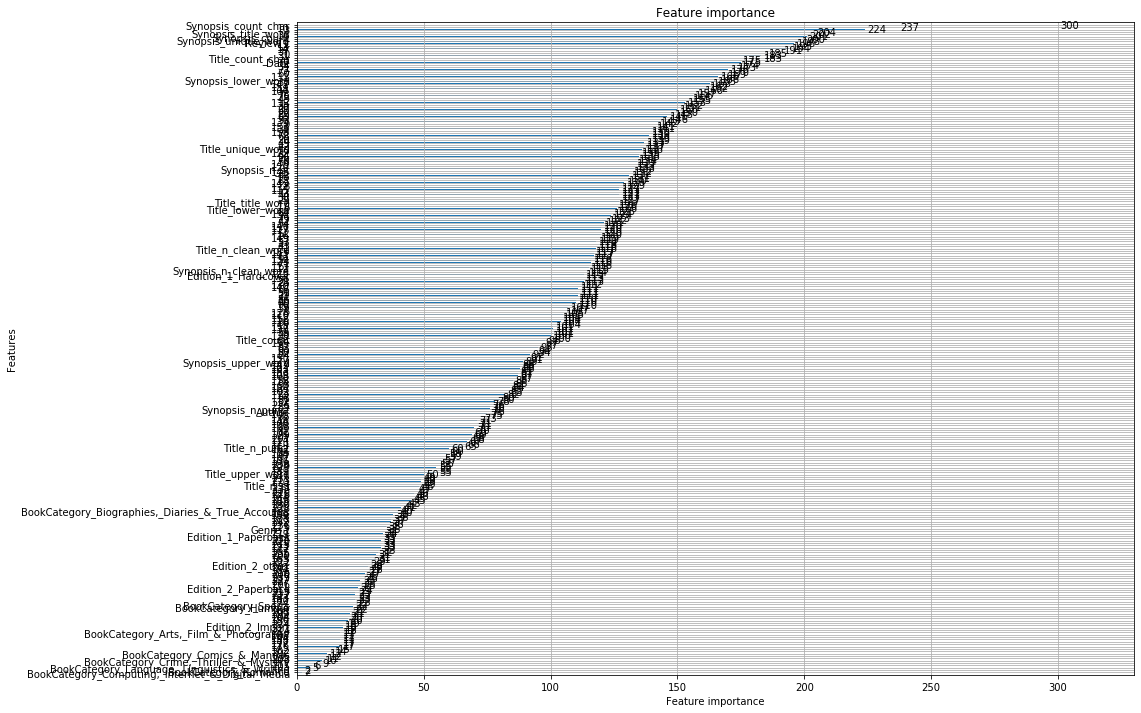

In [146]:
fig, ax  = plt.subplots(1,1, figsize=(15,12))
lgb.plot_importance(model, ax= ax)

In [147]:
test_lgb_1 = np.exp(test_lgb)-1
test_xgb_1 = np.exp(test_xgb)-1

In [286]:
answer1 = np.mean(test_xgb_1, axis = 1)

In [148]:
df = pd.concat([test_lgb_1, test_xgb_1], axis = 1)
answer1 = np.mean(df, axis = 1)

In [78]:
train_xgb_1 = np.exp(train_xgb)-1
train_lgb_1 = np.exp(train_lgb)-1

In [152]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=19)
rf.fit(pd.concat([train_lgb_1, train_xgb_1], axis = 1), np.exp(train_label)-1)
answer = rf.predict(pd.concat([test_lgb_1, test_xgb_1], axis = 1))

Wall time: 21.1 s


In [153]:
pd.DataFrame(answer)

,0
0,570.666713
1,977.774473
2,244.890153
3,964.940067
4,317.102660
...,...
1555,1725.302040
1556,180.042200
1557,620.672380
1558,288.765310


In [624]:
sample.Price = np.exp(answer)-1

In [149]:
sample.Price = answer1.values

In [154]:
sample.Price = answer

In [155]:
sample.to_excel('answer6.xlsx', index=False)

In [156]:
sample

,Price
0,570.666713
1,977.774473
2,244.890153
3,964.940067
4,317.102660
...,...
1555,1725.302040
1556,180.042200
1557,620.672380
1558,288.765310


In [183]:
pd.Series(rf.feature_importances_, index = train.columns)

NameError: name 'rf' is not defined

In [313]:
x

,0,1,2
0,5.777148,0.0,0.000000
1,0.000000,0.0,5.910837
2,5.912602,0.0,0.000000
3,5.640060,0.0,0.000000
4,5.920628,0.0,0.000000
...,...,...,...
6224,6.722651,0.0,0.000000
6225,0.000000,0.0,5.849282
6226,6.410926,0.0,0.000000
6227,5.705458,0.0,0.000000


In [630]:
(ntrain_xgb[0]

0       0.000000
1       0.000000
2       0.000000
3       5.405558
4       6.950172
          ...   
6224    6.043969
6225    0.000000
6226    5.796917
6227    0.000000
6228    0.000000
Name: 0, Length: 6229, dtype: float64

In [295]:
train_lgb

,0,1,2
0,0.000000,0.000000,5.386080
1,0.000000,0.000000,5.712294
2,0.000000,0.000000,5.803772
3,0.000000,5.364648,0.000000
4,7.100501,0.000000,0.000000
...,...,...,...
6198,0.000000,6.297189,0.000000
6199,0.000000,0.000000,5.829923
6200,0.000000,5.687904,0.000000
6201,0.000000,0.000000,5.743549
